In [ ]:
# imporve libralies

import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression




In [ ]:
pwd

'/content'

In [ ]:
#path for the training set
tr_path = "/content/sample_data/train.csv"
#path for the testing set
te_path = "/content/sample_data/test.csv"

# read in csv file as a DataFrame
tr_df = pd.read_csv(tr_path)
te_df = pd.read_csv(te_path)
# explore the first 5 rows
tr_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
tr_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
te_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# drop loan ID
tr_df.drop('Loan_ID',axis = 1, inplace = True)
te_df.drop('Loan_ID',axis = 1, inplace = True)

In [ ]:
#find Null
tr_df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
tr_df['LoanAmount'] = tr_df['LoanAmount'].fillna(tr_df['LoanAmount'].dropna().mean() )
te_df['LoanAmount'] = te_df['LoanAmount'].fillna(te_df['LoanAmount'].dropna().mean() )

#tr_df.head()

# **Visalization**



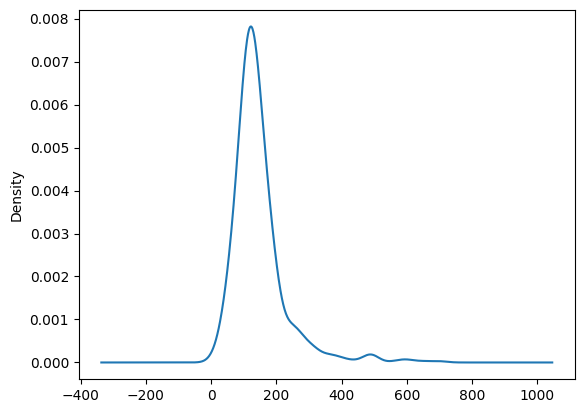

In [ ]:
#estimate the probability density function (PDF) of the train set
ax = tr_df['LoanAmount'].plot.kde()

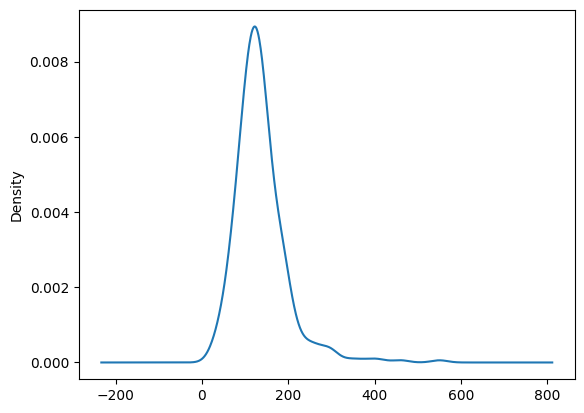

In [ ]:
#estimate the probability density function (PDF) of the test set
ax2 = te_df['LoanAmount'].plot.kde()

In [ ]:
# give tire to each applicant (<= 150 : low) & (<= 150 : high)
condition = [(tr_df['LoanAmount'] <= 150), (tr_df['LoanAmount'] > 150)]
condition_te = [(te_df['LoanAmount'] <= 150), (te_df['LoanAmount'] > 150)]
values = ['tire_low','tire_high']

tr_df['tire'] = np.select(condition,values)
te_df['tire'] = np.select(condition_te,values)
tr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,tire
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,tire_low
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,tire_low
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,tire_low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,tire_low
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,tire_low


<Axes: xlabel='ApplicantIncome', ylabel='tire'>

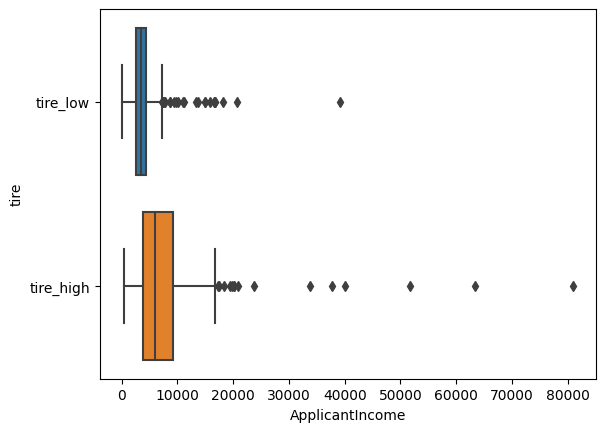

In [ ]:
sns.boxplot(data= tr_df, x="ApplicantIncome", y="tire")

**The applicant who has a high income has the possibility to have a high loan amount.**

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Status'>

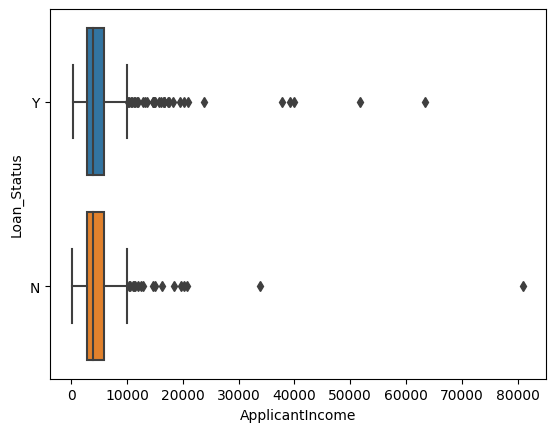

In [ ]:
sns.boxplot(data= tr_df, x="ApplicantIncome", y="Loan_Status")

**Applicant Income does not affect to loan status.**

In [ ]:
# fill Nan of train set based on LoanAmount

tr_df_high_loan = tr_df[tr_df['tire'] == 'tire_high']
tr_df_low_loan = tr_df[tr_df['tire'] == 'tire_low']

null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for col in null_cols:
  tr_df_high_loan[col] = tr_df_high_loan[col].fillna(tr_df_high_loan[col].dropna().mode().values[0] )

for col in null_cols:
  tr_df_low_loan[col] = tr_df_low_loan[col].fillna(tr_df_low_loan[col].dropna().mode().values[0] )

tr_df = pd.concat([tr_df_high_loan, tr_df_low_loan], ignore_index=True)
tr_df.head()

<ipython-input-35-ba86dda14f10>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df_high_loan[col] = tr_df_high_loan[col].fillna(tr_df_high_loan[col].dropna().mode().values[0] )
<ipython-input-35-ba86dda14f10>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_df_high_loan[col] = tr_df_high_loan[col].fillna(tr_df_high_loan[col].dropna().mode().values[0] )
<ipython-input-35-ba86dda14f10>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,tire
0,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,tire_high
1,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,tire_high
2,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,tire_high
3,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,tire_high
4,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y,tire_high


In [ ]:
# fill Nan of test set based on LoanAmount

te_df_high_loan = te_df[tr_df['tire'] == 'tire_high']
te_df_low_loan = te_df[tr_df['tire'] == 'tire_low']


for col in null_cols:
  te_df_high_loan[col] = te_df_high_loan[col].fillna(te_df_high_loan[col].dropna().mode().values[0] )

for col in null_cols:
  te_df_low_loan[col] = te_df_low_loan[col].fillna(te_df_low_loan[col].dropna().mode().values[0] )

te_df = pd.concat([te_df_high_loan, te_df_low_loan], ignore_index=False)
te_df.head()

<ipython-input-36-61bb8618c395>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  te_df_high_loan = te_df[tr_df['tire'] == 'tire_high']
<ipython-input-36-61bb8618c395>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  te_df_low_loan = te_df[tr_df['tire'] == 'tire_low']
<ipython-input-36-61bb8618c395>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te_df_high_loan[col] = te_df_high_loan[col].fillna(te_df_high_loan[col].dropna().mode().values[0] )
<ipython-input-36-61bb8618c395>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,tire
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,tire_low
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,tire_low
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,tire_high
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,tire_low
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,tire_low


<Axes: xlabel='tire', ylabel='count'>

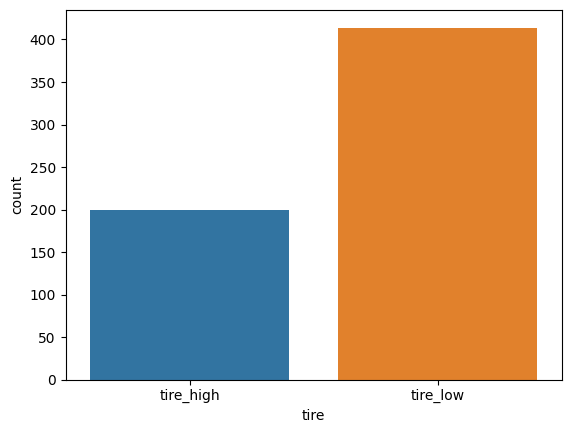

In [ ]:
sns.countplot(x=tr_df["tire"])

<Axes: xlabel='tire', ylabel='count'>

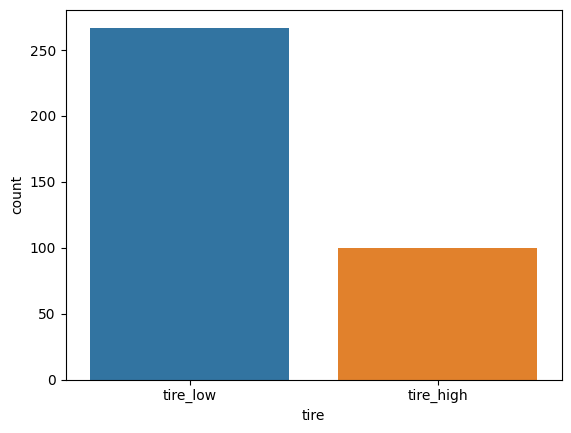

In [ ]:
sns.countplot(x=te_df["tire"])

In [ ]:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = tr_df.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  tr_df[num]
#categoric df
loan_cat = tr_df[cat]

loan_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5417,4196.0,267.0,360.0,1.0
1,3036,2504.0,158.0,360.0,0.0
2,4006,1526.0,168.0,360.0,1.0
3,12841,10968.0,349.0,360.0,1.0
4,3073,8106.0,200.0,360.0,1.0


In [ ]:
loan_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,tire
0,Male,Yes,2,Graduate,Yes,Urban,Y,tire_high
1,Male,Yes,3+,Graduate,No,Semiurban,N,tire_high
2,Male,Yes,2,Graduate,No,Urban,Y,tire_high
3,Male,Yes,1,Graduate,No,Semiurban,N,tire_high
4,Male,Yes,2,Graduate,No,Urban,Y,tire_high


tire_low     414
tire_high    200
Name: tire, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

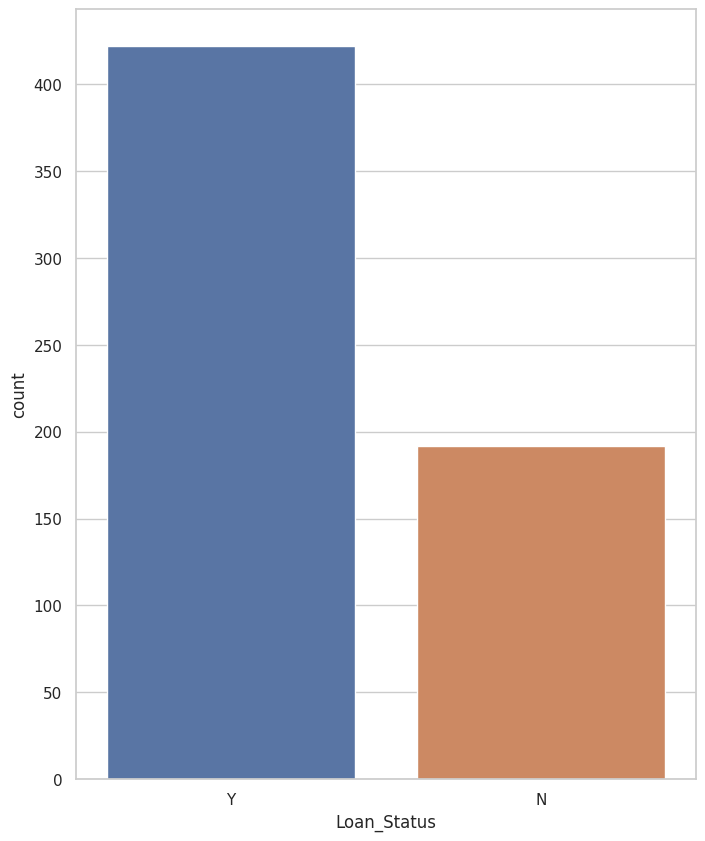

In [ ]:
print(tr_df[cat[-1]].value_counts())

#print(i)
total = float(len(tr_df[cat[-1]]))
plt.figure(figsize=(8,10))
sns.set(style="whitegrid")

sns.countplot(x=loan_cat["Loan_Status"])

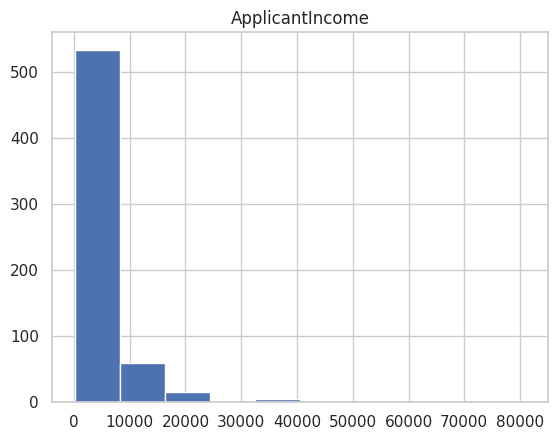

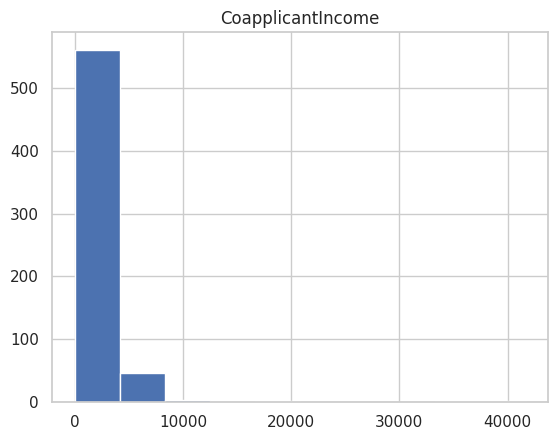

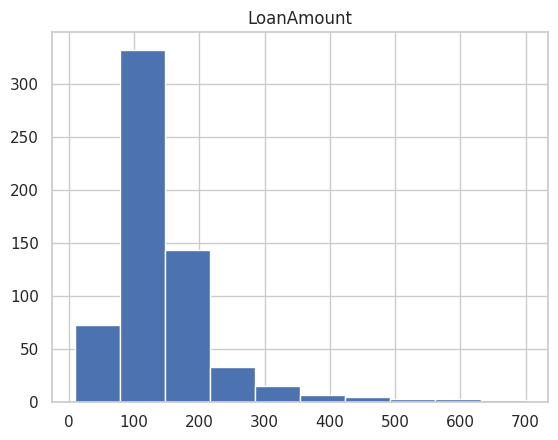

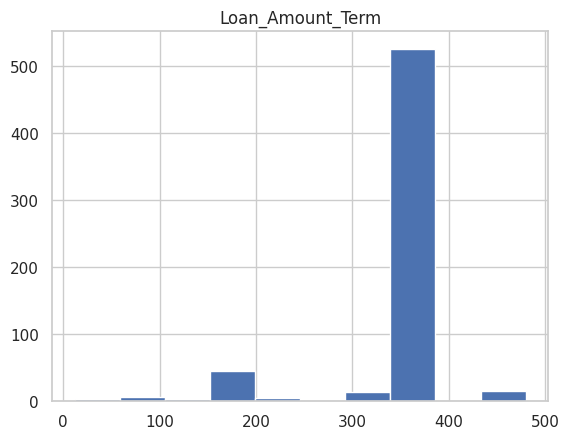

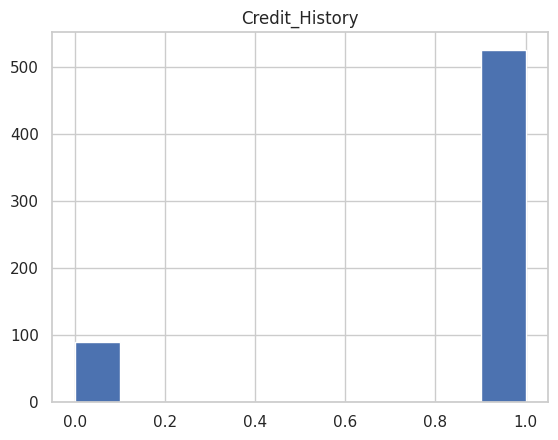

In [ ]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

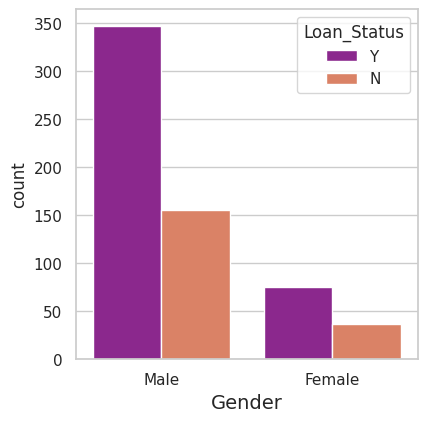

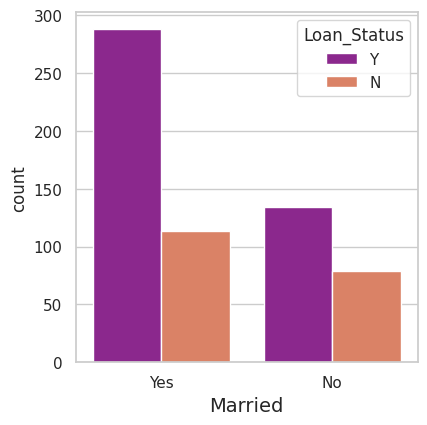

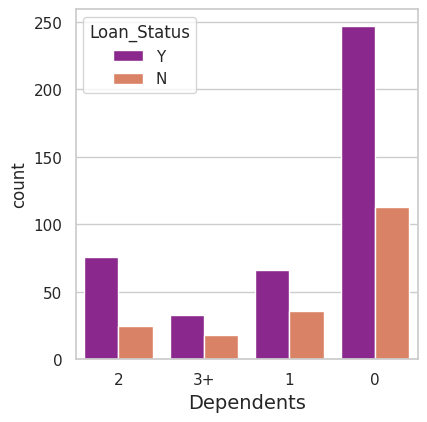

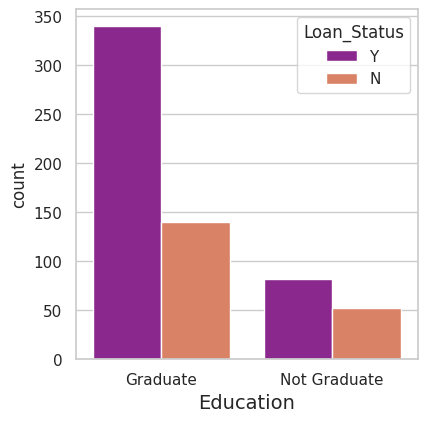

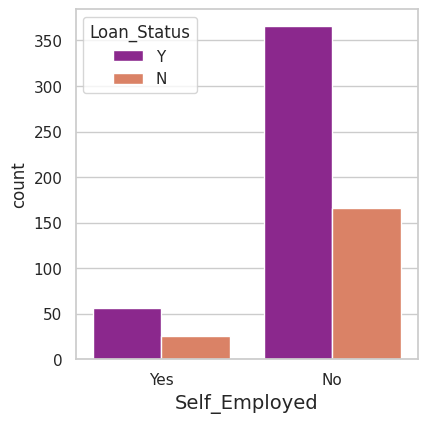

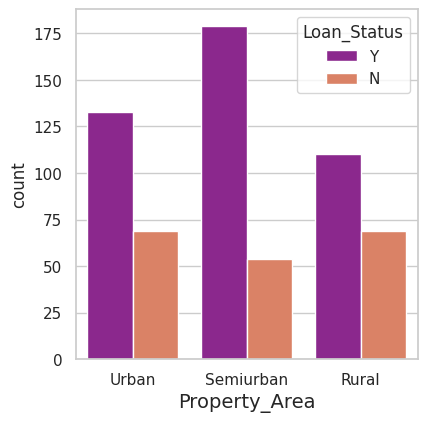

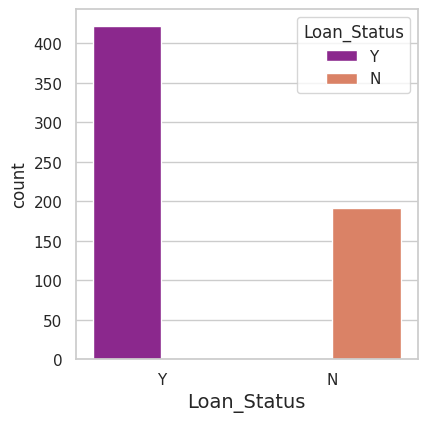

In [ ]:
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=tr_df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

In [ ]:
#Encoding data to numeric
to_numeric = {'Male':1,'Female':2,'Yes':1,'No':2,'Graduate':1,'Not Graduate':2,'Urban':3,'Semiurban':2,'Rural':1,'Y':1,'N':0,'3+':3,'tire_low':1,'tire_high':2}

# adding the new numeric values from the to_numeric variable to both datasets
tr_df = tr_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
te_df = te_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# convert the Dependents column
Dependents_ = pd.to_numeric(tr_df.Dependents)
Dependents__ = pd.to_numeric(te_df.Dependents)

# dropping the previous Dependents column
tr_df.drop(['Dependents'], axis = 1, inplace = True)
te_df.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
tr_df = pd.concat([tr_df, Dependents_], axis = 1)
te_df = pd.concat([te_df, Dependents__], axis = 1)

print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}\n")
print(tr_df.info(), "\n\n", te_df.info())

training set (row, col): (614, 13)

testing set (row, col): (367, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  tire               614 non-null    int64  
 12  Dependents         614 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 62.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367

In [ ]:
#creat correlation matrix
corr = tr_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-45-cd0f44d7a169>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,tire,Dependents
Gender,1.00,0.36,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02,-0.15,-0.17
Married,0.36,1.00,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09,-0.15,-0.33
Education,-0.05,-0.01,1.00,0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09,-0.17,0.06
Self_Employed,-0.00,0.00,0.01,1.00,-0.13,0.02,-0.12,0.03,0.00,0.03,0.00,-0.12,-0.06
ApplicantIncome,-0.06,-0.05,-0.14,-0.13,1.00,-0.12,0.57,-0.05,-0.02,-0.01,-0.00,0.32,0.12
CoapplicantIncome,-0.08,-0.08,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,0.18,0.03
LoanAmount,-0.11,-0.15,-0.17,-0.12,0.57,0.19,1.00,0.04,-0.00,-0.04,-0.04,0.68,0.16
Loan_Amount_Term,0.07,0.10,-0.07,0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02,0.02,-0.10
Credit_History,-0.01,-0.01,-0.07,0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54,0.01,-0.04
Property_Area,0.03,-0.00,-0.07,0.03,-0.01,0.01,-0.04,-0.08,0.00,1.00,0.03,-0.06,-0.00


<Axes: >

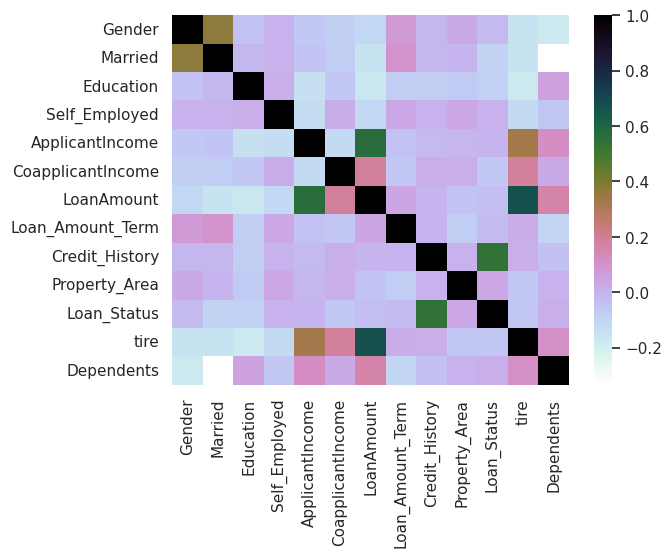

In [ ]:
sns.heatmap(tr_df.corr() ,cmap='cubehelix_r')

### Prediction by Machine **learning** models


In [ ]:
#split train test

y = tr_df['Loan_Status']
X = tr_df.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

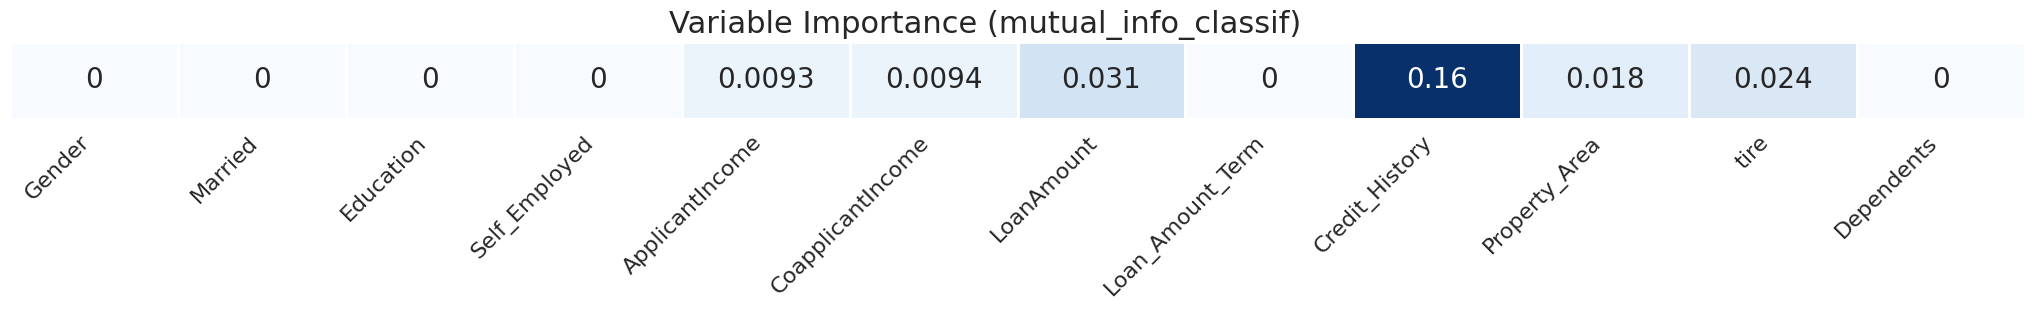

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(X_train.columns, rotation=45, ha='right', fontsize=16)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=22, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

Text(0.5, 0, 'Relative Importance')

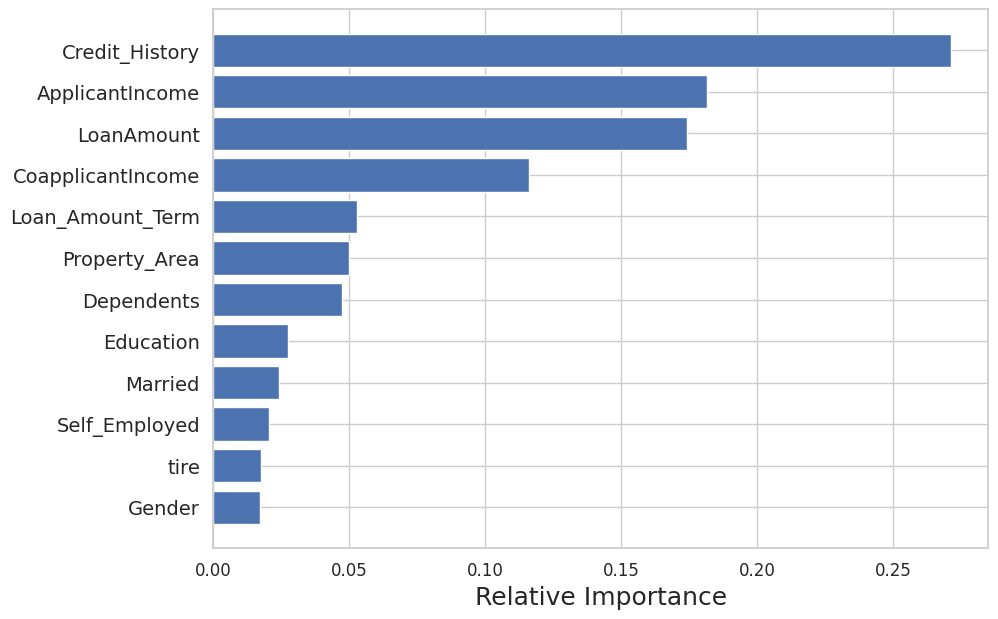

In [ ]:
# plot important feature 
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=14)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

In [ ]:
#create with selected feature
df_feature_sl = tr_df[['Credit_History','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status']]

y = df_feature_sl['Loan_Status']
X = df_feature_sl.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Try Ensemble of Models 
LR = LogisticRegression(multi_class='multinomial', random_state=1)
RF = RandomForestClassifier(n_estimators=50, random_state=1)
XGB = XGBClassifier()

hard_voting = VotingClassifier(estimators=[('lr', LR), ('rf', RF), ('xgb', XGB)], voting='hard')

# Voting Classifier with hard voting 
hard_voting.fit(X_train, y_train) 
y_predict = hard_voting.predict(X_test)

# accuracy_score metric to predict Accuracy 
score = accuracy_score(y_test, y_predict) 
print("softVoting Score % d" % score) 

softVoting Score  0


In [ ]:
print(classification_report(y_test, y_predict))
VOTE_SC = accuracy_score(y_predict,y_test)
print(f"{round(VOTE_SC*100,2)}% Accurate")

d = {'Answer': y_test, 'y_predict': y_predict}
Decision_Tree_decision = pd.DataFrame(data=d)
Decision_Tree_decision.head(10)

              precision    recall  f1-score   support

           0       0.76      0.48      0.59        58
           1       0.80      0.93      0.86       127

    accuracy                           0.79       185
   macro avg       0.78      0.71      0.72       185
weighted avg       0.78      0.79      0.77       185

78.92% Accurate


,Answer,y_predict
454,1,1
52,1,1
536,0,1
469,1,1
55,1,1
62,1,1
539,0,0
432,1,1
367,1,1
482,1,1


In [ ]:
#Try single model : Logistic Regression

LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

d = {'Answer': y_test, 'y_predict': y_predict}
Logistic_Regression_decision = pd.DataFrame(data=d)
Logistic_Regression_decision.head(10)

              precision    recall  f1-score   support

           0       0.88      0.24      0.38        58
           1       0.74      0.98      0.84       127

    accuracy                           0.75       185
   macro avg       0.81      0.61      0.61       185
weighted avg       0.78      0.75      0.70       185

accuracy is 0.7513513513513513


,Answer,y_predict
454,1,1
52,1,1
536,0,1
469,1,1
55,1,1
62,1,1
539,0,0
432,1,1
367,1,1
482,1,1


In [ ]:
#Try single model : Random forest
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

d = {'Answer': y_test, 'y_predict': y_predict}
RF_decision = pd.DataFrame(data=d)
RF_decision.head(10)

              precision    recall  f1-score   support

           0       0.72      0.50      0.59        58
           1       0.80      0.91      0.85       127

    accuracy                           0.78       185
   macro avg       0.76      0.71      0.72       185
weighted avg       0.78      0.78      0.77       185

78.38% Accurate


,Answer,y_predict
454,1,1
52,1,1
536,0,1
469,1,1
55,1,1
62,1,1
539,0,0
432,1,1
367,1,1
482,1,1


In [ ]:
#Try single model : XGboosting
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

d = {'Answer': y_test, 'y_predict': y_predict}
XGB_decision = pd.DataFrame(data=d)
XGB_decision.head(10)

              precision    recall  f1-score   support

           0       0.58      0.52      0.55        58
           1       0.79      0.83      0.81       127

    accuracy                           0.73       185
   macro avg       0.68      0.67      0.68       185
weighted avg       0.72      0.73      0.73       185

72.97% Accurate


,Answer,y_predict
454,1,1
52,1,1
536,0,1
469,1,1
55,1,1
62,1,0
539,0,0
432,1,1
367,1,1
482,1,1


# We select Random forest model since it exhibited highest score among three models 

In [ ]:
# do grid_search
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [ ]:
rf_clf = grid_search.best_estimator_

In [ ]:
# prediction
rf_clf.fit(X_test, y_test)

y_test_predict = rf_clf.predict(X_test)
rf_clf.score(X_test, y_test)

1.0

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test_predict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       127
           0       1.00      1.00      1.00        58

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



In [ ]:
rf_clf_SC = accuracy_score(y_test_predict,y_test)
print(f"{round(rf_clf_SC*100,2)}% Accurate")

d = {'Answer': y_test, 'y_predict': y_test_predict}
decision = pd.DataFrame(data=d)
decision.head(30)

100.0% Accurate


,Answer,y_predict
454,1,1
52,1,1
536,0,0
469,1,1
55,1,1
62,1,1
539,0,0
432,1,1
367,1,1
482,1,1


## **Presiction of the test set**

In [ ]:
#perform prediction with test set
X_df_test = te_df[['Credit_History','ApplicantIncome','CoapplicantIncome','LoanAmount']]


In [ ]:
y2_test_predict = rf_clf.predict(X_df_test)
te_df['Predicted Loan_Status'] = y2_test_predict

te_df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,tire,Dependents,Predicted Loan_Status
0,1,1,1,2,5720,0,110.0,360.0,1.0,3,1,0,1
1,1,1,1,2,3076,1500,126.0,360.0,1.0,3,1,1,1
2,1,1,1,2,5000,1800,208.0,360.0,1.0,3,2,2,1
3,1,1,1,2,2340,2546,100.0,360.0,1.0,3,1,2,1
4,1,2,2,2,3276,0,78.0,360.0,1.0,3,1,0,1
